# -*- coding: utf-8 -*-
"""
Created on Sun Nov 18 20:25:52 2018

Data exploration and cleaning and stuff,

I highly doubt this is the optimal way to do anything that im about to do
The best i will  hope for is that its atleast somewhat correct 

@author: Andrew Garvey
"""
   
# setup 

In [14]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

shamlessly stolen  

In [15]:
def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

# some dir stuff

In [16]:
input_dir = "D:\QUEENS MMAI\823 Finance\Assign\Assign1\InputData"
ouput_dir = "D:\QUEENS MMAI\823 Finance\Assign\Assign1\OutputData"
os.chdir(input_dir)

banks=pd.read_csv('Bankruptcy_data_Final.csv')

# some basic exploring of exploratory stuff 



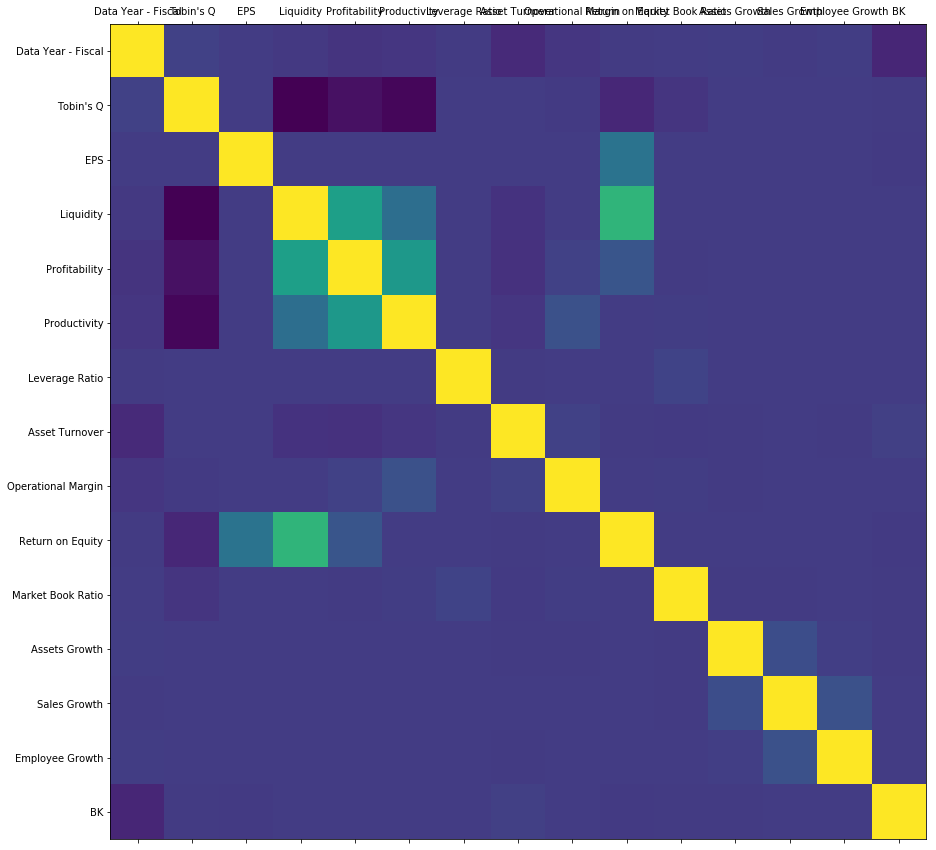

In [17]:
plot_corr(banks)

In [18]:
print(banks.head())

   Data Year - Fiscal  Tobin's Q   EPS  Liquidity  Profitability  \
0                1979       0.98  1.58       0.36           0.18   
1                1980       0.98  1.41       0.36           0.19   
2                1981       0.87  0.31       0.32           0.13   
3                1982       1.13  0.71       0.28           0.14   
4                1983       1.26  0.75       0.41           0.13   

   Productivity  Leverage Ratio  Asset Turnover  Operational Margin  \
0          0.13            1.33            1.77                0.07   
1          0.12            1.31            1.59                0.07   
2          0.08            1.03            1.55                0.05   
3          0.08            0.80            1.39                0.06   
4          0.08            0.20            1.30                0.06   

   Return on Equity  Market Book Ratio  Assets Growth  Sales Growth  \
0              0.15               2.22            NaN           NaN   
1              0.13   

In [19]:
print(banks.describe())#this doesn't show up in its entirety in spyder? normal?

       Data Year - Fiscal      Tobin's Q            EPS     Liquidity  \
count        92872.000000   92620.000000   92867.000000  92625.000000   
mean          2004.105888      25.369008     -14.461355     -2.631237   
std              9.875926     902.818813    2195.467288    121.610921   
min           1979.000000       0.009000 -384000.000000 -25968.520000   
25%           1998.000000       1.120000      -0.140000      0.020000   
50%           2006.000000       1.540000       0.330000      0.190000   
75%           2012.000000       2.590000       1.530000      0.400000   
max           2017.000000  194537.670000   55339.000000      1.000000   

       Profitability  Productivity  Leverage Ratio  Asset Turnover  \
count   92625.000000  92625.000000    92846.000000    92625.000000   
mean      -29.537274     -1.222871        1.345316        1.053613   
std       677.230667     35.885556      253.038093        2.115945   
min    -79682.000000  -5093.000000    -7811.000000      -31.59

## CLEANING PLAN 
# Going to be super simple because i don't know what im doing, may potentially have to do this later, in a more complicated way
# 1. Drop any rows that have NaN (ideally we'd impute them)
# 2. Remove the Year (ideally i'd like to shift it by 1 as i think it'd more predictive, or atleast more interesting)
# 3. Oversample (ideally we'd SMOTE)
# 4. Normalize the rows (i'm not even gonna bother rn)

In [23]:
# 1.Drop entire rows with any NaN
banks1 = banks.dropna()

In [24]:
# 2.remove the year 
banks2 = banks1.drop(['Data Year - Fiscal'],axis =1)

In [31]:
# 3.Oversampling process 

# figure out how many 1s and 0s we have right now
number1= len(banks2.loc[banks2['BK']==1])
number0= len(banks2) - number1
print(number1)
print(number0)

473
80731


In [26]:
# there appear to be 473 1s and  80731 0s, lets add a bunch more 1s VIA duplication, so they have basically the same amount
BK1 = banks2.loc[banks2['BK']==1]
BK0 = banks2.loc[banks2['BK']==0]

#pick a number to make them basically the same
ratio = round(number0/number1) 
DupBK1 = pd.concat([BK1]*ratio)

In [27]:
#Now Union them together
Final = BK0.append(DupBK1)

# double check numbers
FinalNumber1= len(Final.loc[Final['BK']==1])
FinalNumber0= len(Final) - FinalNumber1
print(FinalNumber1)
print(FinalNumber0)

80883
80731


In [28]:
import platform
print(platform.python_version())

3.6.7
